# Project 2 : Optimization

## Retiree Income Projection 
### Masaya Inoue

In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import basic libraries

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats

In [3]:
np.random.seed(42)

In [4]:
data_path ="./data/"

CA_tax_file = "CA_tax.csv"
Federal_tax_file = "Federal_tax.csv"
Inflation_rate_file = "Inflation_rate.csv"
Life_expectancy_file = "Life_expectancy.csv"

CA_tax_data = pd.read_csv(data_path + CA_tax_file, delimiter = ',')
Federal_tax_data = pd.read_csv(data_path + Federal_tax_file, delimiter = ',')
Inflation_rate_data = pd.read_csv(data_path + Inflation_rate_file, delimiter = ',')
Life_expectancy_data = pd.read_csv(data_path + Life_expectancy_file, delimiter = ',')

CA_tax_df = CA_tax_data.copy()
Federal_tax_df = Federal_tax_data.copy()
Inflation_rate_df = Inflation_rate_data.copy()
Life_expectancy_df = Life_expectancy_data.copy()

Input 4 csv files: 'CA_tax.csv', 'Federal_tax.csv', 'Inflation_rate.csv', and 'Life_expectancy.csv'
Create data folder to store all csv files. Maku sure all csv files are located in the "./data/" directory. You can change the file name, directory path, and delimiter (if necessary) to match the actual structure of your CSV files.

In [5]:
# Create Input
Beg_Savings_Balance = float(input("Enter Initial Savings Balance   "))
Savins_interest_rate = float(input("Enter Interest Rate for Savings Account (In %)   "))
Beg_IRA_Balance = float(input("Enter Initial IRA Balance" ))
IRA_interest_rate = float(input("Enter Interest Rate for IRA account (In %)   "))
living_expense = float(input("Enter Annual Spending Budget" ))
Age = int(input("Enter your age   "))
Year = int(input("Enter year"))
YearCalendar = 1

Enter Initial Savings Balance   580000
Enter Interest Rate for Savings Account (In %)   6
Enter Initial IRA Balance400000
Enter Interest Rate for IRA account (In %)   8
Enter Annual Spending Budget81500
Enter your age   62
Enter year2023


By using input function, set the initial values, including saving balance, IRA balance, and etc.

In [6]:
CA_tax_df

,Over,Base Tax,Excess%
0,0,0.0000,0.0110
1,20198,222.1780,0.0220
2,47884,831.2700,0.0440
3,75576,2049.7180,0.0660
4,104910,3985.7620,0.0880
5,132590,6421.6020,0.1023
6,677278,62143.1844,0.1133
7,812728,77489.6694,0.1243
8,1000000,100767.5790,0.1353
9,1354550,148738.1940,0.1463


In [7]:
Beg_Savings_Balance_copy = Beg_Savings_Balance
Savins_interest_rate_copy = Savins_interest_rate
Beg_IRA_Balance_copy = Beg_IRA_Balance
IRA_interest_rate_copy = IRA_interest_rate
living_expense_copy = living_expense
Age_copy = Age

In [8]:
#Convert % into decimal number
savings_int = Savins_interest_rate/100
IRA_int = IRA_interest_rate_copy/100

In [9]:
#Calculate the total balance 
Beg_Total_Balance = Beg_Savings_Balance + Beg_IRA_Balance

In [10]:
#Define a function for Tax Calculation of Federal
def federal_tax(taxable_income):

    Over_federal = Federal_tax_df.loc[Federal_tax_df['Over'] <= taxable_income, ['Over']].iloc[-1,0]
    Basetax_federal = Federal_tax_df.loc[Federal_tax_df['Over'] <= taxable_income, ['Base Tax']].iloc[-1,0]
    Rate_federal = Federal_tax_df.loc[Federal_tax_df['Over'] <= taxable_income, ['Excess%']].iloc[-1,0]
    Excess_federal = (taxable_income - Over_federal) * Rate_federal
    Total_federal = Basetax_federal + Excess_federal
    
    return Total_federal

In [11]:
#Define a function Tax Calculation of CA
def CA_tax(taxable_income):

    Over_CA = CA_tax_df.loc[CA_tax_df['Over'] <= taxable_income, ['Over']].iloc[-1,0]
    Basetax_CA = CA_tax_df.loc[CA_tax_df['Over'] <= taxable_income, ['Base Tax']].iloc[-1,0]
    Rate_CA = CA_tax_df.loc[CA_tax_df['Over'] <= taxable_income, ['Excess%']].iloc[-1,0]
    Excess_CA = (taxable_income - Over_CA ) * Rate_CA
    Total_CA = Basetax_CA + Excess_CA

    return Total_CA


In [12]:
# Define a function for Tax Calculation of MA
def MA_tax(taxable_income):

    Total_MA = taxable_income * 0.05
    
    return Total_MA

In [13]:
#Define a function for the calculation of tax from IRA

def find_optimal_taxable_income(living_expense, savingsbalance_input=0, initial_taxable_income=0, tolerance=0.01):
    """
    Find the optimal taxable income.
    Args:
    - living_expense: Income needed to secure for living
    - initial_taxable_income: Starting estimate for taxable income
    - tolerance: Tolerance level for convergence
    """
    taxable_income = initial_taxable_income
    iteration = 0
    max_iterations = 1000  # Maximum iterations to prevent infinite loop

    while iteration < max_iterations:
        iteration += 1
 
        # Calculate total tax to be paid in a state
        if Location == "MA":
            total_tax_state = MA_tax(taxable_income)
        if Location == "CA":
            total_tax_state = CA_tax(taxable_income)
            
        # Calculate total tax to be paid Federal
        total_tax_federal = federal_tax(taxable_income)

        # Calculate total tax to be paid
        total_tax = total_tax_state + total_tax_federal

        # Update taxable income
        new_taxable_income = living_expense + total_tax 

        # Check for convergence
        if abs(new_taxable_income - taxable_income) < tolerance:
            return new_taxable_income, total_tax, total_tax_federal, total_tax_state

        taxable_income = new_taxable_income - savingsbalance_input

    return taxable_income, total_tax, total_tax_federal, total_tax_state

In [14]:
#Define a function for the calculation for one year

def Calculate_balances_in_one_year(Location, Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, Savins_interest_rate, IRA_interest_rate, living_expense):
    
    #Calculation for Interest based on the balance and rate
    Savings_interest = Beg_Savings_Balance * savings_int
    IRA_interest = Beg_IRA_Balance * IRA_int
    
    #Calculate infrated living expense
    living_expense = living_expense * (1+inflation_rate)
    
    #Use Money in saving account as long as available
    if (Beg_Savings_Balance + Savings_interest > living_expense):
        New_Savings_Balance = Beg_Savings_Balance + Savings_interest - living_expense
    else:
        New_Savings_Balance = 0

    
    if (New_Savings_Balance==0) and (Savings_interest==0):
        optimal_taxable_income = find_optimal_taxable_income(living_expense)[0]
        
        total_tax = find_optimal_taxable_income(living_expense)[1]
        total_tax_federal = find_optimal_taxable_income(living_expense)[2]
        total_tax_state = find_optimal_taxable_income(living_expense)[3]

        Total_Cost_for_Saving = 0
        Total_Cost_for_IRA = living_expense + total_tax - (Beg_Savings_Balance + Savings_interest)
        IRA_withdrawal = optimal_taxable_income
        
    elif (New_Savings_Balance==0) and (Savings_interest!=0):

        savingsbalance_input = Beg_Savings_Balance
        optimal_taxable_income = find_optimal_taxable_income(living_expense, savingsbalance_input)[0]
        total_tax = find_optimal_taxable_income(living_expense, savingsbalance_input)[1]
        total_tax_federal = find_optimal_taxable_income(living_expense, savingsbalance_input)[2]
        total_tax_state = find_optimal_taxable_income(living_expense, savingsbalance_input)[3]


        Total_Cost_for_Saving = Beg_Savings_Balance + Savings_interest
        Total_Cost_for_IRA = living_expense + total_tax - (Beg_Savings_Balance + Savings_interest)
        IRA_withdrawal = optimal_taxable_income - Savings_interest

        
    else:
        optimal_taxable_income = Savings_interest
        taxable_income = optimal_taxable_income

        # Calculate total tax to be paid in a state
        if Location == "MA":
            total_tax_state = MA_tax(taxable_income)
            
        if Location == "CA":
            total_tax_state = CA_tax(taxable_income)
            
        # Calculate total tax to be paid Federal
        
        total_tax_federal = federal_tax(taxable_income)
        
        # Calculate total tax to be paid
        total_tax = total_tax_state + total_tax_federal
        
        # print(optimal_taxable_income, total_tax)
        Total_Cost_for_Saving = living_expense + total_tax
        Total_Cost_for_IRA = 0
        

        IRA_withdrawal = 0

    # Ending balance
    Beg_Savings_Balance = Beg_Savings_Balance + Savings_interest - Total_Cost_for_Saving
    Beg_IRA_Balance = Beg_IRA_Balance +  IRA_interest - Total_Cost_for_IRA
    Beg_Total_Balance = Beg_Savings_Balance + Beg_IRA_Balance
    
    return Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, living_expense, optimal_taxable_income, IRA_withdrawal, total_tax, total_tax_federal, total_tax_state, Total_Cost_for_Saving, Total_Cost_for_IRA  

In [15]:
from IPython.display import display, HTML

#Define a function to apply styles and freeze the entire first column
def freeze_first_column(df):
    styles = [{'selector': 'th:first-child', 'props': 'position: sticky; left: 0; background-color: lightgray;'},
              {'selector': 'td:first-child', 'props': 'position: sticky; left: 0; background-color: lightgray;'}]
    return df.style.set_table_styles(styles)


## Balance Prediction in Massachusetts

In [16]:
# You can see If you live in Massachusetts

Location = "MA"

# Create a dataframe
index_names = ['Year','Age', 'Beg_Total_Balance', 'Beg_Savings_Balance', 'Beg_IRA_Balance', \
               'living_expense', 'IRA_withdrawal', 'optimal_taxable_income', \
               'total_tax', 'total_tax_federal', 'total_tax_state',
               'Total_Cost_for_Saving', 'Total_Cost_for_IRA', \
               'End_Total_Balance', 'End_Savings_Balance', 'End_IRA_Balance']
df_MA = pd.DataFrame(index=index_names)


# Execution
for year in range(Year, Year+36):
   
    # Input info for each frame
    df_MA[str(year)] = np.nan
    df_MA.loc['Year', str(year)] = YearCalendar
    df_MA.loc['Age', str(year)] = Age
    df_MA.loc['Beg_Total_Balance', str(year)] = Beg_Total_Balance
    df_MA.loc['Beg_Savings_Balance', str(year)] = Beg_Savings_Balance
    df_MA.loc['Beg_IRA_Balance', str(year)] = Beg_IRA_Balance
    

    # Calculate balance in one year
    inflation_rate = float(Inflation_rate_df.loc[Inflation_rate_df['Year'] == Year, 'Percentage Change'].iloc[0])
    Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, living_expense, optimal_taxable_income, IRA_withdrawal, total_tax, total_tax_federal, total_tax_state, Total_Cost_for_Saving, Total_Cost_for_IRA = \
    Calculate_balances_in_one_year(Location, Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, Savins_interest_rate, IRA_interest_rate, living_expense)
    
    
    #  Input calculated info for each frame
    df_MA.loc['living_expense', str(year)] = living_expense
    df_MA.loc['IRA_withdrawal', str(year)] = IRA_withdrawal
    df_MA.loc['optimal_taxable_income', str(year)] = optimal_taxable_income
    
    df_MA.loc['total_tax', str(year)] = total_tax
    df_MA.loc['total_tax_federal', str(year)] = total_tax_federal
    df_MA.loc['total_tax_state', str(year)] = total_tax_state

    df_MA.loc['Total_Cost_for_Saving', str(year)] = Total_Cost_for_Saving
    df_MA.loc['Total_Cost_for_IRA', str(year)] = Total_Cost_for_IRA
    
    df_MA.loc['End_Total_Balance', str(year)] = Beg_Total_Balance
    df_MA.loc['End_Savings_Balance', str(year)] = Beg_Savings_Balance
    df_MA.loc['End_IRA_Balance', str(year)] = Beg_IRA_Balance
    
    YearCalendar = YearCalendar + 1
    Year = Year + 1
    Age = Age + 1
    
    

    # End if total balance is running out
    if Beg_Total_Balance < 0:
        print('Your total money seems to run out in ' + str(year) + ' when you are ' + str(Age) + ' years old.')
        break

Your total money seems to run out in 2036 when you are 76 years old.


## Balance Prediction in California

In [17]:
# You can see If you live in California

Location = "CA"

# Create a dataframe
index_names = ['Year','Age', 'Beg_Total_Balance', 'Beg_Savings_Balance', 'Beg_IRA_Balance', \
               'living_expense', 'IRA_withdrawal', 'optimal_taxable_income', \
               'total_tax', 'total_tax_federal', 'total_tax_state',
               'Total_Cost_for_Saving', 'Total_Cost_for_IRA', \
               'End_Total_Balance', 'End_Savings_Balance', 'End_IRA_Balance']
df_CA = pd.DataFrame(index=index_names)

#Reset Variables
Year = 2023
YearCalendar = 1
Beg_Savings_Balance = Beg_Savings_Balance_copy
Savins_interest_rate = Savins_interest_rate_copy
Beg_IRA_Balance = Beg_IRA_Balance_copy
IRA_interest_rate = IRA_interest_rate_copy
living_expense = living_expense_copy
Age = Age_copy
Beg_Total_Balance = Beg_Savings_Balance + Beg_IRA_Balance

# Execute
for year in range(Year, Year+36):
    # print(year)
   
    # Input info for each frame
    df_CA[str(year)] = np.nan
    df_CA.loc['Year', str(year)] = YearCalendar
    df_CA.loc['Age', str(year)] = Age
    df_CA.loc['Beg_Total_Balance', str(year)] = Beg_Total_Balance
    df_CA.loc['Beg_Savings_Balance', str(year)] = Beg_Savings_Balance
    df_CA.loc['Beg_IRA_Balance', str(year)] = Beg_IRA_Balance
    

    # Calculate balance in one year
    inflation_rate = float(Inflation_rate_df.loc[Inflation_rate_df['Year'] == Year, 'Percentage Change'].iloc[0])
    Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, living_expense, optimal_taxable_income, IRA_withdrawal, total_tax, total_tax_federal, total_tax_state, Total_Cost_for_Saving, Total_Cost_for_IRA = \
    Calculate_balances_in_one_year(Location, Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, Savins_interest_rate, IRA_interest_rate, living_expense)
    
    
    #  Input calculated info for each frame
    df_CA.loc['living_expense', str(year)] = living_expense
    df_CA.loc['IRA_withdrawal', str(year)] = IRA_withdrawal
    df_CA.loc['optimal_taxable_income', str(year)] = optimal_taxable_income
    
    df_CA.loc['total_tax', str(year)] = total_tax
    df_CA.loc['total_tax_federal', str(year)] = total_tax_federal
    df_CA.loc['total_tax_state', str(year)] = total_tax_state

    df_CA.loc['Total_Cost_for_Saving', str(year)] = Total_Cost_for_Saving
    df_CA.loc['Total_Cost_for_IRA', str(year)] = Total_Cost_for_IRA
    
    df_CA.loc['End_Total_Balance', str(year)] = Beg_Total_Balance
    df_CA.loc['End_Savings_Balance', str(year)] = Beg_Savings_Balance
    df_CA.loc['End_IRA_Balance', str(year)] = Beg_IRA_Balance
    
    YearCalendar = YearCalendar + 1
    Year = Year + 1
    Age = Age + 1
    

    # End if total balance is running out
    if Beg_Total_Balance < 0:
        print('Your total money seems to run out in ' + str(year) + ' when you are ' + str(Age) + ' years old.')
        break

Your total money seems to run out in 2037 when you are 77 years old.


## Prediction Results (Massachusetts vs California)

In [18]:
freeze_first_column(df_MA)

,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036
Year,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000
Age,62.000000,63.000000,64.000000,65.000000,66.000000,67.000000,68.000000,69.000000,70.000000,71.000000,72.000000,73.000000,74.000000,75.000000
Beg_Total_Balance,980000.000000,953226.575000,921866.366777,887206.612188,849877.709650,809839.150108,766976.396214,721079.767002,658455.450754,575836.334231,483240.199872,379786.282468,264518.102614,136382.801707
Beg_Savings_Balance,580000.000000,521226.575000,455306.366777,383321.812188,305682.125650,222107.919388,132226.667036,35550.059491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Beg_IRA_Balance,400000.000000,432000.000000,466560.000000,503884.800000,544195.584000,587731.230720,634749.729178,685529.707512,658455.450754,575836.334231,483240.199872,379786.282468,264518.102614,136382.801707
living_expense,88097.425000,92317.291658,95098.811655,97169.112785,99163.994670,101208.756240,103420.167564,105751.258141,108150.754188,110609.020831,113127.588235,115710.291075,118371.627770,121094.175208
IRA_withdrawal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81916.633359,135295.552583,138663.041098,142113.133394,145651.082451,149296.749116,153026.266115
optimal_taxable_income,34800.000000,31273.594500,27318.382007,22999.308731,18340.927539,13326.475163,7933.600022,84049.636928,135295.552583,138663.041098,142113.133394,145651.082451,149296.749116,153026.266115
total_tax,5476.000000,4876.511065,4204.124941,3469.882484,2751.139131,1998.971274,1190.040003,13848.438278,27144.798394,28054.020266,28985.545159,29940.791376,30925.121346,31932.090906
total_tax_federal,3736.000000,3312.831340,2838.205841,2319.917048,1834.092754,1332.647516,793.360002,9645.956431,20380.020914,21120.868365,21879.888648,22658.237417,23460.284060,24280.777775


In [19]:
freeze_first_column(df_CA)

,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037
Year,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000
Age,62.000000,63.000000,64.000000,65.000000,66.000000,67.000000,68.000000,69.000000,70.000000,71.000000,72.000000,73.000000,74.000000,75.000000,76.000000
Beg_Total_Balance,980000.000000,954423.153000,924222.383259,890671.009094,854386.612353,815303.853855,773252.319790,727999.858744,669277.373439,587621.987746,495806.804383,392930.060980,278012.195782,149973.888571,7675.182692
Beg_Savings_Balance,580000.000000,522423.153000,457662.383259,386786.209094,310191.028353,227572.623135,138502.590613,42470.151232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Beg_IRA_Balance,400000.000000,432000.000000,466560.000000,503884.800000,544195.584000,587731.230720,634749.729178,685529.707512,669277.373439,587621.987746,495806.804383,392930.060980,278012.195782,149973.888571,7675.182692
living_expense,88097.425000,92317.291658,95098.811655,97169.112785,99163.994670,101208.756240,103420.167564,105751.258141,108150.754188,110609.020831,113127.588235,115710.291075,118371.627770,121094.175208,123879.341238
IRA_withdrawal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71094.710674,135197.575568,138824.942383,142541.287753,146352.270077,150279.282873,154296.616964,158406.349740
optimal_taxable_income,34800.000000,31345.389180,27459.742996,23207.172546,18611.461701,13654.357388,8310.155437,73642.919748,135197.575568,138824.942383,142541.287753,146352.270077,150279.282873,154296.616964,158406.349740
total_tax,4279.422000,3788.867264,3237.105505,2633.240501,2065.872249,1515.633670,922.427253,10361.812839,27046.821380,28215.921552,29413.699518,30641.979002,31907.655104,33202.441756,34527.008501
total_tax_federal,3736.000000,3321.446702,2855.169159,2344.860705,1861.146170,1365.435739,831.015544,8397.150370,20358.465106,21156.485701,21974.081582,22812.497612,23676.440344,24560.253758,25464.394882


In [20]:
# Pick up total tax rows from both tables
SA_IRA_Balance_MA = df_MA.round(0).iloc[3:5].transpose()
SA_IRA_Balance_CA = df_CA.round(0).iloc[3:5].transpose()

# Put them into a same table
Change_balance = pd.concat([SA_IRA_Balance_MA, SA_IRA_Balance_CA], axis=1)
# Put the header for each columns
Change_balance.columns =['Beg_Savings_Balance(MA)', 'Beg_IRA_Balance(MA)', 'Beg_Savings_Balance(CA)', 'Beg_IRA_Balance(CA)']

Change_balance

,Beg_Savings_Balance(MA),Beg_IRA_Balance(MA),Beg_Savings_Balance(CA),Beg_IRA_Balance(CA)
2023,580000.0,400000.0,580000.0,400000.0
2024,521227.0,432000.0,522423.0,432000.0
2025,455306.0,466560.0,457662.0,466560.0
2026,383322.0,503885.0,386786.0,503885.0
2027,305682.0,544196.0,310191.0,544196.0
2028,222108.0,587731.0,227573.0,587731.0
2029,132227.0,634750.0,138503.0,634750.0
2030,35550.0,685530.0,42470.0,685530.0
2031,0.0,658455.0,0.0,669277.0
2032,0.0,575836.0,0.0,587622.0


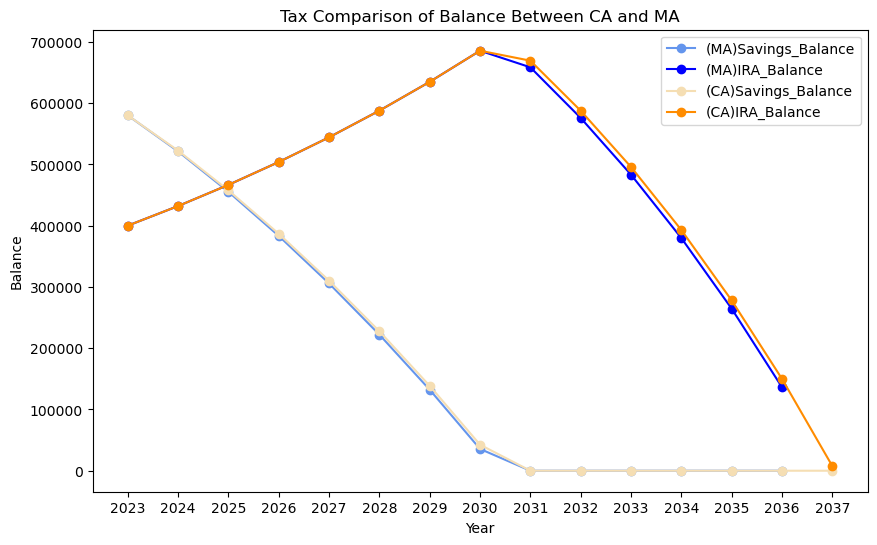

In [21]:
# Let's visualize it
# Pick up index year, Tax_in_CA and Tax_in_MA from Total_Tax dataframe
Year = Change_balance.index.tolist()
Savings_Balance_MA = Change_balance['Beg_Savings_Balance(MA)'].tolist()
IRA_Balance_MA = Change_balance['Beg_IRA_Balance(MA)'].tolist()
Savings_Balance_CA = Change_balance['Beg_Savings_Balance(CA)'].tolist()
IRA_Balance_CA = Change_balance['Beg_IRA_Balance(CA)'].tolist()

# Visualize line charts
plt.figure(figsize=(10, 6)) 
plt.plot(Year, Savings_Balance_MA, label='(MA)Savings_Balance', marker='o', linestyle='-', color='cornflowerblue')
plt.plot(Year, IRA_Balance_MA, label='(MA)IRA_Balance', marker='o', linestyle='-', color='blue')
plt.plot(Year, Savings_Balance_CA, label='(CA)Savings_Balance', marker='o', linestyle='-', color='wheat')
plt.plot(Year, IRA_Balance_CA, label='(CA)IRA_Balance', marker='o', linestyle='-', color='darkorange')
plt.legend()

plt.title('Tax Comparison of Balance Between CA and MA')
plt.xlabel('Year')
plt.ylabel('Balance')

plt.show()

In [22]:
Total_Tax_in_MA_Yealy = df_MA.iloc[8] 
Tax_in_CA_Yealy = df_CA.iloc[8]

Total_Tax = pd.concat([Total_Tax_in_MA_Yealy, Tax_in_CA_Yealy], axis=1)
Total_Tax.columns = ['Tax_in_MA', 'Tax_in_CA']

Total_Tax

,Tax_in_MA,Tax_in_CA
2023,5476.000000,4279.422000
2024,4876.511065,3788.867264
2025,4204.124941,3237.105505
2026,3469.882484,2633.240501
2027,2751.139131,2065.872249
2028,1998.971274,1515.633670
2029,1190.040003,922.427253
2030,13848.438278,10361.812839
2031,27144.798394,27046.821380
2032,28054.020266,28215.921552


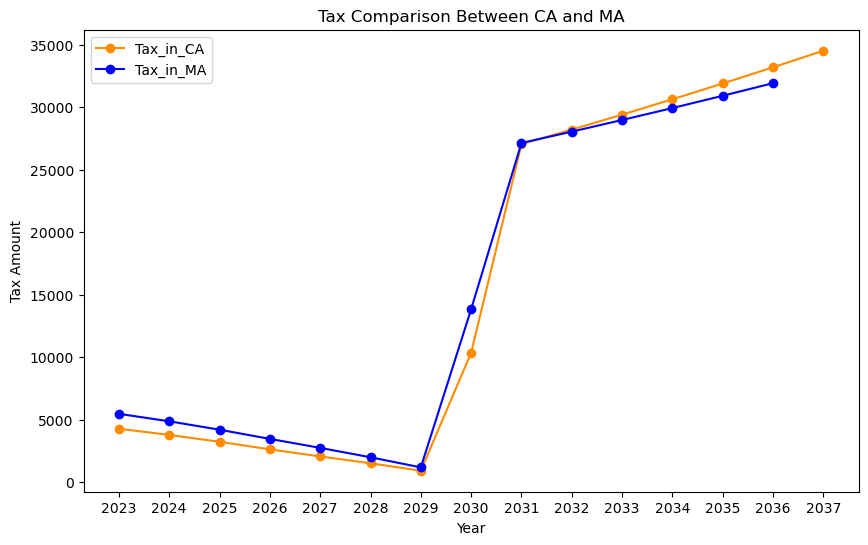

In [23]:
# Let's visualize it
# Pick up index year, Tax_in_CA and Tax_in_MA from Total_Tax dataframe
Year = Total_Tax.index.tolist()
Tax_in_CA_Yealy = Total_Tax['Tax_in_CA'].tolist()
Tax_in_MA_Yealy = Total_Tax['Tax_in_MA'].tolist()

# Visualize line charts
plt.figure(figsize=(10, 6))
plt.plot(Year, Tax_in_CA_Yealy, label='Tax_in_CA', marker='o', linestyle='-', color='darkorange')
plt.plot(Year, Tax_in_MA_Yealy, label='Tax_in_MA', marker='o', linestyle='-', color='blue')
plt.legend()

# put the title and lables
plt.title('Tax Comparison Between CA and MA')
plt.xlabel('Year')
plt.ylabel('Tax Amount')

plt.show()

In [24]:
# Comparison of the total tax
total_tax_in_MA = Total_Tax['Tax_in_MA'].sum().round(0)
total_tax_in_CA = Total_Tax['Tax_in_CA'].sum().round(0)

print("Total tax(MA):", total_tax_in_MA)
print("Total tax(CA):", total_tax_in_CA)

Total tax(MA): 214797.0
Total tax(CA): 243760.0


In [25]:
SA_amount_MA = df_MA.round(0).iloc[3]
IRA_Withdrawal_MA = df_MA.round(0).iloc[6]
Total_tax_MA = df_MA.round(0).iloc[8]
SA_amount_CA = df_CA.round(0).iloc[3]
IRA_Withdrawal_CA = df_CA.round(0).iloc[6]
Total_tax_CA = df_CA.round(0).iloc[8]

table1 = pd.concat([SA_amount_MA, IRA_Withdrawal_MA, Total_tax_MA, SA_amount_CA, IRA_Withdrawal_CA, Total_tax_CA], axis=1)
table1.columns = ['Saving_amount_MA', 'IRA_withdrawal_MA', 'Total_Tax_MA', 'Saving_amount_CA', 'IRA_withdrawal_CA', 'Total_Tax_CA']

table1

,Saving_amount_MA,IRA_withdrawal_MA,Total_Tax_MA,Saving_amount_CA,IRA_withdrawal_CA,Total_Tax_CA
2023,580000.0,0.0,5476.0,580000.0,0.0,4279.0
2024,521227.0,0.0,4877.0,522423.0,0.0,3789.0
2025,455306.0,0.0,4204.0,457662.0,0.0,3237.0
2026,383322.0,0.0,3470.0,386786.0,0.0,2633.0
2027,305682.0,0.0,2751.0,310191.0,0.0,2066.0
2028,222108.0,0.0,1999.0,227573.0,0.0,1516.0
2029,132227.0,0.0,1190.0,138503.0,0.0,922.0
2030,35550.0,81917.0,13848.0,42470.0,71095.0,10362.0
2031,0.0,135296.0,27145.0,0.0,135198.0,27047.0
2032,0.0,138663.0,28054.0,0.0,138825.0,28216.0


In [26]:
# Caluculate total IRA Tax(MA) 
table1['Total_Tax_MA'] = np.where((table1['IRA_withdrawal_MA'] == 0), 0,
                                  np.where((table1['IRA_withdrawal_MA'] > 0) & (table1['Saving_amount_MA'] > 0),
                                           table1['Total_Tax_MA'] * table1['Saving_amount_MA'] / table1['IRA_withdrawal_MA'],
                                           table1['Total_Tax_MA']))

# Caluculate total IRA Tax(CA) 
table1['Total_Tax_CA'] = np.where((table1['IRA_withdrawal_CA'] == 0), 0,
                                  np.where((table1['IRA_withdrawal_CA'] > 0) & (table1['Saving_amount_CA'] > 0),
                                           table1['Total_Tax_CA'] * table1['Saving_amount_CA'] / table1['IRA_withdrawal_CA'],
                                           table1['Total_Tax_CA']))

# Put them together into a table
table2 = table1[['Total_Tax_MA', 'Total_Tax_CA']]
table2.columns = ["IRA Tax(MA)", "IRA Tax(CA)"]

table2.sum()

IRA Tax(MA)    182992.697621
IRA Tax(CA)    221145.945003
dtype: float64

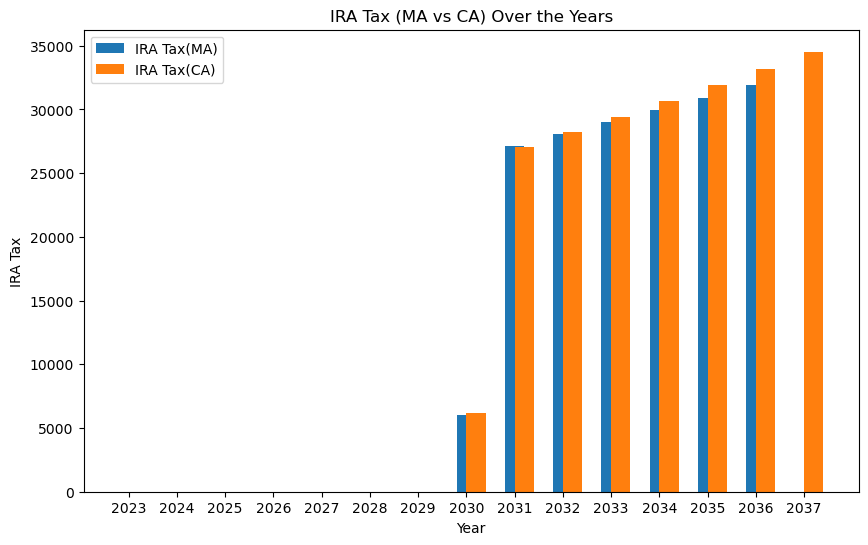

In [27]:
plt.figure(figsize=(10, 6))

# Y axis
total_tax_ma = table2["IRA Tax(MA)"]
total_tax_ca = table2["IRA Tax(CA)"]

# X axis = year
years = table2.index

# Plot bar chart
plt.bar(years, total_tax_ma, width=0.4, label="IRA Tax(MA)", align="center")
plt.bar(years, total_tax_ca, width=0.4, label="IRA Tax(CA)", align="edge")

plt.xlabel("Year")
plt.ylabel("IRA Tax")
plt.title("IRA Tax (MA vs CA) Over the Years")
plt.legend()

plt.show()

In [28]:
#If you sell the house in MA (according to MA average $580,000)

the_sale_of_house_MA = 580000

house_tax_state = MA_tax(the_sale_of_house_MA)
house_tax_federal = federal_tax(the_sale_of_house_MA)

the_income_from_house_after_tax = the_sale_of_house_MA - (house_tax_state + house_tax_federal)
the_income_from_house_after_tax 

404211.0

Reference: Massachusetts home value. Zillow.com. 
https://www.zillow.com/home-values/26/ma/

## Recommendation 1 

### Selling the house in MA

In [29]:
#Recommendation 1

Location = "CA"
#Create a data frame
index_names = ['Year','Age', 'Beg_Total_Balance', 'Beg_Savings_Balance', 'Beg_IRA_Balance', \
               'living_expense', 'IRA_withdrawal', 'optimal_taxable_income', \
               'total_tax', 'total_tax_federal', 'total_tax_state',
               'Total_Cost_for_Saving', 'Total_Cost_for_IRA', \
               'End_Total_Balance', 'End_Savings_Balance', 'End_IRA_Balance']
df_CA_2 = pd.DataFrame(index=index_names)

#Reset Variables
Year = 2023
YearCalendar = 1
Beg_Savings_Balance = Beg_Savings_Balance_copy + the_income_from_house_after_tax
Savins_interest_rate = Savins_interest_rate_copy
Beg_IRA_Balance = Beg_IRA_Balance_copy
IRA_interest_rate = IRA_interest_rate_copy
living_expense = living_expense_copy
Age = Age_copy
Beg_Total_Balance = Beg_Savings_Balance + Beg_IRA_Balance

# Execute
for year in range(Year, Year+36):
    # print(year)
   
    # Input info for each frame
    df_CA_2[str(year)] = np.nan
    df_CA_2.loc['Year', str(year)] = YearCalendar
    df_CA_2.loc['Age', str(year)] = Age
    df_CA_2.loc['Beg_Total_Balance', str(year)] = Beg_Total_Balance
    df_CA_2.loc['Beg_Savings_Balance', str(year)] = Beg_Savings_Balance
    df_CA_2.loc['Beg_IRA_Balance', str(year)] = Beg_IRA_Balance
    


    # Calculate balance in one year
    inflation_rate = float(Inflation_rate_df.loc[Inflation_rate_df['Year'] == Year, 'Percentage Change'].iloc[0])
    Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, living_expense, optimal_taxable_income, IRA_withdrawal, total_tax, total_tax_federal, total_tax_state, Total_Cost_for_Saving, Total_Cost_for_IRA = \
    Calculate_balances_in_one_year(Location, Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, Savins_interest_rate, IRA_interest_rate, living_expense)
    
    
    # Input calculated info for each frame
    df_CA_2.loc['living_expense', str(year)] = living_expense
    df_CA_2.loc['IRA_withdrawal', str(year)] = IRA_withdrawal
    df_CA_2.loc['optimal_taxable_income', str(year)] = optimal_taxable_income
    
    df_CA_2.loc['total_tax', str(year)] = total_tax
    df_CA_2.loc['total_tax_federal', str(year)] = total_tax_federal
    df_CA_2.loc['total_tax_state', str(year)] = total_tax_state

    df_CA_2.loc['Total_Cost_for_Saving', str(year)] = Total_Cost_for_Saving
    df_CA_2.loc['Total_Cost_for_IRA', str(year)] = Total_Cost_for_IRA
    
    df_CA_2.loc['End_Total_Balance', str(year)] = Beg_Total_Balance
    df_CA_2.loc['End_Savings_Balance', str(year)] = Beg_Savings_Balance
    df_CA_2.loc['End_IRA_Balance', str(year)] = Beg_IRA_Balance
    
    YearCalendar = YearCalendar + 1
    Year = Year + 1
    Age = Age + 1
    
    
    if Beg_Total_Balance < 0:
        print('Your total money seems to run out in ' + str(year) + ' when you are ' + str(YearCalendar+62) + ' years old.')
        break

Your total money seems to run out in 2046 when you are 87 years old.


In [30]:
freeze_first_column(df_CA_2)

,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046
Year,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000
Age,62.000000,63.000000,64.000000,65.000000,66.000000,67.000000,68.000000,69.000000,70.000000,71.000000,72.000000,73.000000,74.000000,75.000000,76.000000,77.000000,78.000000,79.000000,80.000000,81.000000,82.000000,83.000000,84.000000,85.000000
Beg_Total_Balance,1384211.000000,1379197.224760,1370666.971896,1359958.591952,1347756.550571,1334150.446704,1319048.028160,1302297.693361,1283802.205733,1263519.178934,1241422.948221,1217495.007729,1191590.498631,1163632.074184,1127276.120647,1059051.860559,981165.403035,892747.071093,792855.395973,680471.313053,554491.905011,413723.640073,256875.068088,82423.461495
Beg_Savings_Balance,984211.000000,947197.224760,904106.971896,856073.791952,803560.966571,746419.215984,684298.298982,616767.985850,543430.121620,463917.328093,377852.949312,284839.408907,184322.451903,75782.583718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Beg_IRA_Balance,400000.000000,432000.000000,466560.000000,503884.800000,544195.584000,587731.230720,634749.729178,685529.707512,740372.084113,799601.850842,863569.998909,932655.598822,1007268.046728,1087849.490466,1127276.120647,1059051.860559,981165.403035,892747.071093,792855.395973,680471.313053,554491.905011,413723.640073,256875.068088,82423.461495
living_expense,88097.425000,92317.291658,95098.811655,97169.112785,99163.994670,101208.756240,103420.167564,105751.258141,108150.754188,110609.020831,113127.588235,115710.291075,118371.627770,121094.175208,123879.341238,126728.566087,129643.323107,132625.119538,135675.497287,138796.033725,141988.342501,145254.074378,148594.918089,152309.791041
IRA_withdrawal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47601.329056,158406.349740,162610.606368,166911.564185,171311.440807,175812.514598,180417.113086,185127.617339,189946.463190,195001.612040,200649.890472
optimal_taxable_income,59052.660000,56831.833486,54246.418314,51364.427517,48213.657994,44785.152959,41057.897939,37006.079151,32605.807297,27835.039686,22671.176959,17090.364534,11059.347114,52148.284079,158406.349740,162610.606368,166911.564185,171311.440807,175812.514598,180417.113086,185127.617339,189946.463190,195001.612040,200649.890472
total_tax,7969.010240,7604.794692,7180.786603,6708.140113,6191.413911,5697.313720,5168.043507,4592.685239,3967.846636,3290.397635,2557.129128,1897.030463,1227.587530,6836.692589,34527.008501,35882.040282,37268.241078,38686.321269,40137.017311,41621.079361,43139.274839,44692.388812,46406.693951,48340.099431
total_tax_federal,6646.319200,6379.820018,6069.570198,5723.731302,5345.638959,4934.218355,4486.947753,4000.729498,3472.696876,2900.204762,2280.541235,1709.036453,1105.934711,5817.794090,25464.394882,26389.331250,27335.543398,28303.516225,29293.752431,30306.764069,31343.074975,32403.221032,33600.384891,34955.971555


## Recommendation 2

### Adjust your annual expense year by year

In [31]:
#Define a function for the calculating balance in one year (Considering Inflation Prediction)

def Calculate_balances_in_one_year_adjusted_living_expenses(Location, Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, Savins_interest_rate, IRA_interest_rate, living_expense):
    
    #Calculation for Interest based on the balance and rate
    Savings_interest = Beg_Savings_Balance * savings_int
    IRA_interest = Beg_IRA_Balance * IRA_int
    
    #Calculate adjusted living expense to the inflation prediction
    living_expense = living_expense / (1+inflation_rate)
    
    #Use Money in saving account as long as available
    if (Beg_Savings_Balance + Savings_interest > living_expense):
        New_Savings_Balance = Beg_Savings_Balance + Savings_interest - living_expense
    else:
        New_Savings_Balance = 0

    
    if (New_Savings_Balance==0) and (Savings_interest==0):
        optimal_taxable_income = find_optimal_taxable_income(living_expense)[0]
        
        total_tax = find_optimal_taxable_income(living_expense)[1]
        total_tax_federal = find_optimal_taxable_income(living_expense)[2]
        total_tax_state = find_optimal_taxable_income(living_expense)[3]

        Total_Cost_for_Saving = 0
        Total_Cost_for_IRA = living_expense + total_tax - (Beg_Savings_Balance + Savings_interest)
        IRA_withdrawal = optimal_taxable_income
        
    elif (New_Savings_Balance==0) and (Savings_interest!=0):

        savingsbalance_input = Beg_Savings_Balance
        optimal_taxable_income = find_optimal_taxable_income(living_expense, savingsbalance_input)[0]
        total_tax = find_optimal_taxable_income(living_expense, savingsbalance_input)[1]
        total_tax_federal = find_optimal_taxable_income(living_expense, savingsbalance_input)[2]
        total_tax_state = find_optimal_taxable_income(living_expense, savingsbalance_input)[3]


        Total_Cost_for_Saving = Beg_Savings_Balance + Savings_interest
        Total_Cost_for_IRA = living_expense + total_tax - (Beg_Savings_Balance + Savings_interest)
        IRA_withdrawal = optimal_taxable_income - Savings_interest

        
    else:
        optimal_taxable_income = Savings_interest
        taxable_income = optimal_taxable_income

        # Calculate total tax to be paid in a state
        if Location == "MA":
            total_tax_state = MA_tax(taxable_income)
            
        if Location == "CA":
            total_tax_state = CA_tax(taxable_income)
            
        # Calculate total tax to be paid Federal
        
        total_tax_federal = federal_tax(taxable_income)
        
        # Calculate total tax to be paid
        total_tax = total_tax_state + total_tax_federal
        
        # print(optimal_taxable_income, total_tax)
        Total_Cost_for_Saving = living_expense + total_tax
        Total_Cost_for_IRA = 0
        

        IRA_withdrawal = 0

    # Ending balance
    Beg_Savings_Balance = Beg_Savings_Balance + Savings_interest - Total_Cost_for_Saving
    Beg_IRA_Balance = Beg_IRA_Balance +  IRA_interest - Total_Cost_for_IRA
    Beg_Total_Balance = Beg_Savings_Balance + Beg_IRA_Balance
    
    return Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, living_expense, optimal_taxable_income, IRA_withdrawal, total_tax, total_tax_federal, total_tax_state, Total_Cost_for_Saving, Total_Cost_for_IRA  

In [32]:
#Recommendation 2

Location = "CA"

# Create the data frame
index_names = ['Year','Age', 'Beg_Total_Balance', 'Beg_Savings_Balance', 'Beg_IRA_Balance', \
               'living_expense', 'IRA_withdrawal', 'optimal_taxable_income', \
               'total_tax', 'total_tax_federal', 'total_tax_state',
               'Total_Cost_for_Saving', 'Total_Cost_for_IRA', \
               'End_Total_Balance', 'End_Savings_Balance', 'End_IRA_Balance']
df_CA_3 = pd.DataFrame(index=index_names)

#Reset Variables
Year = 2023
YearCalendar = 1
Beg_Savings_Balance = Beg_Savings_Balance_copy 
Savins_interest_rate = Savins_interest_rate_copy
Beg_IRA_Balance = Beg_IRA_Balance_copy
IRA_interest_rate = IRA_interest_rate_copy
living_expense = living_expense_copy
Age = Age_copy
Beg_Total_Balance = Beg_Savings_Balance + Beg_IRA_Balance

# Execute
for year in range(Year, Year+36):
    # print(year)
   
    # Input 
    df_CA_3[str(year)] = np.nan
    df_CA_3.loc['Year', str(year)] = YearCalendar
    df_CA_3.loc['Age', str(year)] = Age
    df_CA_3.loc['Beg_Total_Balance', str(year)] = Beg_Total_Balance
    df_CA_3.loc['Beg_Savings_Balance', str(year)] = Beg_Savings_Balance
    df_CA_3.loc['Beg_IRA_Balance', str(year)] = Beg_IRA_Balance
    


    # Calculate balance for each year
    inflation_rate = float(Inflation_rate_df.loc[Inflation_rate_df['Year'] == Year, 'Percentage Change'].iloc[0])
    Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, living_expense, optimal_taxable_income, IRA_withdrawal, total_tax, total_tax_federal, total_tax_state, Total_Cost_for_Saving, Total_Cost_for_IRA = \
    Calculate_balances_in_one_year_adjusted_living_expenses(Location, Beg_Total_Balance, Beg_Savings_Balance, Beg_IRA_Balance, Savins_interest_rate, IRA_interest_rate, living_expense)
    
    
    #  Input calculated info for each year
    df_CA_3.loc['living_expense', str(year)] = living_expense
    df_CA_3.loc['IRA_withdrawal', str(year)] = IRA_withdrawal
    df_CA_3.loc['optimal_taxable_income', str(year)] = optimal_taxable_income
    
    df_CA_3.loc['total_tax', str(year)] = total_tax
    df_CA_3.loc['total_tax_federal', str(year)] = total_tax_federal
    df_CA_3.loc['total_tax_state', str(year)] = total_tax_state

    df_CA_3.loc['Total_Cost_for_Saving', str(year)] = Total_Cost_for_Saving
    df_CA_3.loc['Total_Cost_for_IRA', str(year)] = Total_Cost_for_IRA
    
    df_CA_3.loc['End_Total_Balance', str(year)] = Beg_Total_Balance
    df_CA_3.loc['End_Savings_Balance', str(year)] = Beg_Savings_Balance
    df_CA_3.loc['End_IRA_Balance', str(year)] = Beg_IRA_Balance
    
    YearCalendar = YearCalendar + 1
    Year = Year + 1
    Age = Age + 1
    
    
    if Beg_Total_Balance < 0:
        print('Running out in ' + str(year))
        break

In [33]:
df_CA_3

,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,...,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058
Year,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,2.700000e+01,2.800000e+01,2.900000e+01,3.000000e+01,3.100000e+01,3.200000e+01,3.300000e+01,3.400000e+01,3.500000e+01,3.600000e+01
Age,62.000000,63.000000,64.000000,65.000000,66.000000,67.000000,68.000000,69.000000,70.000000,71.000000,...,8.800000e+01,8.900000e+01,9.000000e+01,9.100000e+01,9.200000e+01,9.300000e+01,9.400000e+01,9.500000e+01,9.600000e+01,9.700000e+01
Beg_Total_Balance,980000.000000,967123.936157,957944.068374,951381.725334,947034.201718,944987.681399,945419.424764,948544.656956,954606.123528,963846.548803,...,1.582260e+06,1.662414e+06,1.750132e+06,1.845990e+06,1.950612e+06,2.064674e+06,2.188903e+06,2.324087e+06,2.471080e+06,2.630875e+06
Beg_Savings_Balance,580000.000000,535123.936157,491384.068374,447496.925334,402838.617718,357256.450679,310669.695587,263014.949445,214234.039415,164244.697962,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Beg_IRA_Balance,400000.000000,432000.000000,466560.000000,503884.800000,544195.584000,587731.230720,634749.729178,685529.707512,740372.084113,799601.850842,...,1.582260e+06,1.662414e+06,1.750132e+06,1.845990e+06,1.950612e+06,2.064674e+06,2.188903e+06,2.324087e+06,2.471080e+06,2.630875e+06
living_expense,75396.641843,71950.226017,69845.772880,68357.627333,66982.477078,65629.202914,64225.867705,62810.127433,61416.585116,60051.611976,...,4.049634e+04,3.950863e+04,3.854500e+04,3.760488e+04,3.668769e+04,3.579287e+04,3.491987e+04,3.406816e+04,3.317251e+04,3.230040e+04
IRA_withdrawal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.642676e+04,4.527558e+04,4.415247e+04,4.305676e+04,4.198777e+04,4.094486e+04,3.992738e+04,3.893472e+04,3.789083e+04,3.687438e+04
optimal_taxable_income,34800.000000,32107.436169,29483.044102,26849.815520,24170.317063,21435.387041,18640.181735,15780.896967,12854.042365,9854.681878,...,4.642676e+04,4.527558e+04,4.415247e+04,4.305676e+04,4.198777e+04,4.094486e+04,3.992738e+04,3.893472e+04,3.789083e+04,3.687438e+04
total_tax,4279.422000,3897.077936,3524.414263,3150.495804,2770.007023,2392.939219,2069.060173,1751.679563,1426.798703,1093.869688,...,5.930422e+03,5.766954e+03,5.607473e+03,5.451881e+03,5.300085e+03,5.151991e+03,5.007509e+03,4.866551e+03,4.718319e+03,4.573983e+03
total_tax_federal,3736.000000,3412.892340,3097.965292,2781.977862,2460.438048,2143.538704,1864.018174,1578.089697,1285.404236,985.468188,...,5.131211e+03,4.993069e+03,4.858296e+03,4.726811e+03,4.598532e+03,4.473382e+03,4.351285e+03,4.232165e+03,4.106899e+03,3.984925e+03
